
# Project: Investigate a Dataset (TMDb)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
</ul>

<a id='intro'></a>
## Introduction
# Welcome to the Investigate a Dataset project! in this project, we analyze dataset of movies. This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
# this dataset contains columns like ('id','popularity','budget','revenue','runtime','vote_count','vote_average','release_year','budget_adj','revenue_adj')
							

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import num2words as num2words
import seaborn as sns


<a id='wrangling'></a>
## Data Wrangling
# we clean datasets and check duplicates


In [35]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
data = pd.read_csv("tmdb-movies.csv")
data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [36]:
data.shape

(10866, 21)

In [37]:
data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [38]:
countS=data['vote_count'].sum()
print('The sum vote count of movies : ',countS, ' hrs')

The sum vote count of movies :  2362157  hrs


In [39]:
mn=data['runtime'].min()/60
print('The longest movie : ',mn,' hrs')

The longest movie :  0.0  hrs


In [40]:
Average=data['runtime'].mean()/60
print('The Average time movie : ',Average, ' hrs')

The Average time movie :  1.7011810540523957  hrs


In [41]:
mx=data['runtime'].max()/60
print('The longest movie : ',mx,' hrs')

The longest movie :  15.0  hrs


In [42]:
countS=data['budget'].mean()
print('The Average budget of movies : ',countS, ' $')

The Average budget of movies :  14625701.09414688  $


In [43]:
rev=data['revenue'].mean()
print('The Average revenue of movies : ',rev, ' $')

The Average revenue of movies :  39823319.79339223  $


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [45]:
important_data=data[['id','imdb_id','popularity','budget','revenue','original_title','cast','director','runtime',
                     'genres','production_companies','release_date','vote_count','release_year']]
important_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,release_year
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,2015
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,2015
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,2015
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,2015
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,2015


In [13]:
important_data.nunique()


id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
director                 5067
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
release_year               56
dtype: int64

In [14]:
important_data.shape

(10866, 14)

In [15]:
important_data=important_data.drop_duplicates()

In [16]:
important_data.shape
#only one column is duplicated.

(10865, 14)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.

### Research Question 1 (info about the most Common Cast)

In [48]:
#The most common cast of movies
#The genre of the most common cast
#The count of the most common cast of movies

def mostCommonCast():
    print('Data about cast')
    print('-'*30)
    start_time=time.time()
    mostCommonCast=important_data['cast'].mode()[0]
    SpecificCast=important_data[important_data['cast']==mostCommonCast]
    countOfMostCommonCast=len( SpecificCast)
    mostCommonGenreOfCast=SpecificCast['genres'].mode()[0]
    print('The most common Cast                   : ',mostCommonCast,'\n')
    print('The most genre of the most common Cast : ',mostCommonGenreOfCast,'\n')
    print('The count of the most common Cast          : ',num2words.num2words(countOfMostCommonCast),'\n')
    
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('*'*70)

    
    
mostCommonCast()

Data about cast
------------------------------
The most common Cast                   :  Louis C.K. 

The most genre of the most common Cast :  Comedy 

The count of the most common Cast          :  six 


This took 0.009974241256713867 seconds.
**********************************************************************


### Research Question 2  (info about Revenue)

In [49]:

def Revenue():
    print('The data of revenue')
    print('-'*30)
    start_time=time.time()
    biggestRevenue = data['revenue'].max()
    biggestRevenueDf = data[data['revenue'] == biggestRevenue]
    countOfBiggestRevenue = len(biggestRevenueDf)
    mostCommonGenreOfBiggestRevenue = biggestRevenueDf['genres'].mode()[0]
    biggestRevenueCast = biggestRevenueDf["cast"].mode()[0];
    print('the biggest Revenue                      : ',num2words.num2words(biggestRevenue),'\n')
    print('The most genre of the biggest Revenue    : ',mostCommonGenreOfBiggestRevenue,'\n')
    print('The count of the biggest Revenue         : ',num2words.num2words(countOfBiggestRevenue),'\n')
    print('The cast of this movie                   : ',biggestRevenueCast,'\n')
    
    print('-'*30,'\n')
    smallestRevenue = data['revenue'].min()
    smallestRevenueDf = data[data['revenue'] == smallestRevenue]
    countOfsmallestRevenue = len(smallestRevenueDf)
    mostCommonGenreOfsmallestRevenue = smallestRevenueDf['genres'].mode()[0]
    smallestRevenueCast = smallestRevenueDf["cast"].mode()[0];
    print('the smallest Revenue                        : ',num2words.num2words(smallestRevenue),'\n')
    print('The most Common genre of the smallest Revenue : ',mostCommonGenreOfsmallestRevenue,'\n')
    print('The count of the smallest Revenue             : ',num2words.num2words(countOfsmallestRevenue),'\n')
    print('The cast of this movie                        : ',smallestRevenueCast,'\n')

    
    print('-'*30,'\n','\n')
    AvgRevenue = data['revenue'].mean();
    lessAvgRevenueDf = data[data['revenue'] <= AvgRevenue]
    moreAvgRevenueDf  = data[data['revenue'] > AvgRevenue]
    print('The Avg Revenue of movies                   : ',num2words.num2words(AvgRevenue),'\n')
    print('The count of movies less than Avg Revenue   : ',num2words.num2words(len(lessAvgRevenueDf)),'\n')
    print('The count of movies more than Avg Revenue   : ',num2words.num2words(len(moreAvgRevenueDf)),'\n')
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('*'*70)

Revenue()

The data of revenue
------------------------------
the biggest Revenue                      :  two billion, seven hundred and eighty-one million, five hundred and five thousand, eight hundred and forty-seven 

The most genre of the biggest Revenue    :  Action|Adventure|Fantasy|Science Fiction 

The count of the biggest Revenue         :  one 

The cast of this movie                   :  Sam Worthington|Zoe Saldana|Sigourney Weaver|Stephen Lang|Michelle Rodriguez 

------------------------------ 

the smallest Revenue                        :  zero 

The most Common genre of the smallest Revenue :  Comedy 

The count of the smallest Revenue             :  six thousand and sixteen 

The cast of this movie                        :  Louis C.K. 

------------------------------ 
 

The Avg Revenue of movies                   :  thirty-nine million, eight hundred and twenty-three thousand, three hundred and nineteen point seven nine three three nine two two three 

The count of movies less t

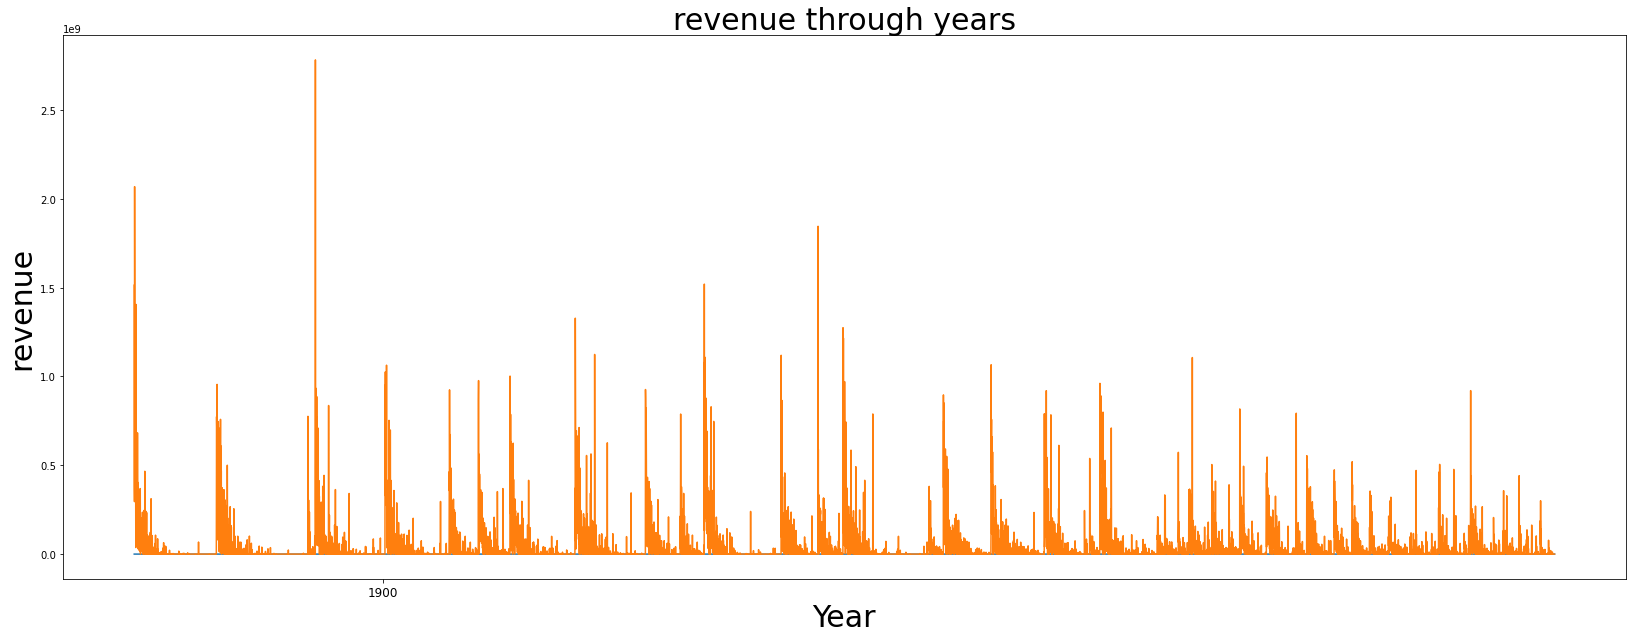

In [19]:
revenuesOfYear=important_data[['release_year','revenue']]

plt.figure(figsize=(28,10))
plt.xlabel('Year', fontsize= 30)
plt.title('revenue through years', fontsize= 30)
plt.ylabel('revenue', fontsize = 30)
plt.xticks( np.arange(1900, 2019, step=500),fontsize= 12)
#plotting the graph
plt.plot(revenuesOfYear)
plt.show()

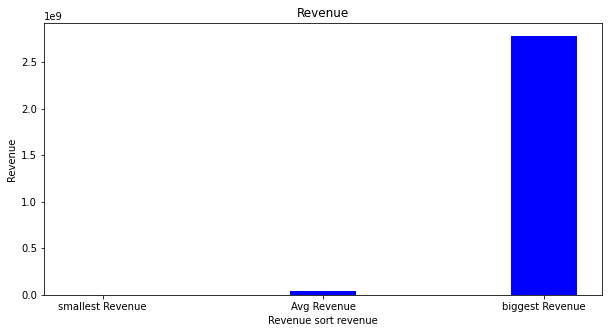

In [20]:
smallestRevenue = data['revenue'].min()
biggestRevenue = data['revenue'].max()
AvgRevenue = data['revenue'].mean();

smallestRevenueDf = data[data['revenue'] == smallestRevenue]
smallestRevenueCast = smallestRevenueDf["cast"].mode()[0];
biggestRevenueDf = data[data['revenue'] == biggestRevenue]
biggestRevenueCast = biggestRevenueDf["cast"].mode()[0];


rows = [ 'smallest Revenue','Avg Revenue','biggest Revenue']
columns = [smallestRevenue,AvgRevenue,biggestRevenue]
fig = plt.figure(figsize = (10, 5)) 
# creating the bar plot
plt.bar(rows, columns, color ='blue',
        width = 0.3)
plt.xlabel("Revenue sort revenue")
plt.ylabel("Revenue")
plt.title("Revenue")
plt.show()

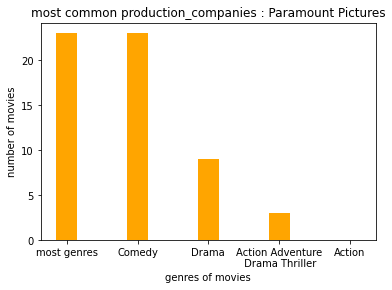

In [21]:
countmostCommonPro=important_data['production_companies'].value_counts().max()
MostCommonPro=important_data['production_companies'].mode()[0]

MostCommonProDF=important_data[important_data['production_companies'] == 'Paramount Pictures']
MostCommonProDFComedy=len(MostCommonProDF[MostCommonProDF['genres'] == 'Comedy'])
MostCommonProDFDrama=len(MostCommonProDF[MostCommonProDF['genres'] == 'Drama'])
MostCommonProDFAction=len(MostCommonProDF[MostCommonProDF['genres'] == 'Action'])
MostCommonProDFActionAdv=len(MostCommonProDF[MostCommonProDF['genres'] == 'Action|Adventure|Drama|Thriller'])
MostCommonProGeners=MostCommonProDF['genres'].value_counts().max()
rows=['most genres','Comedy','Drama','Action Adventure\n Drama Thriller','Action']
columns=[MostCommonProGeners,MostCommonProDFComedy,MostCommonProDFDrama,MostCommonProDFActionAdv,MostCommonProDFAction]
plt.bar(rows, columns, color ='orange',
        width = 0.3)
 
plt.xlabel("genres of movies")
plt.ylabel("number of movies")
plt.title("most common production_companies : " + MostCommonPro)
plt.show()



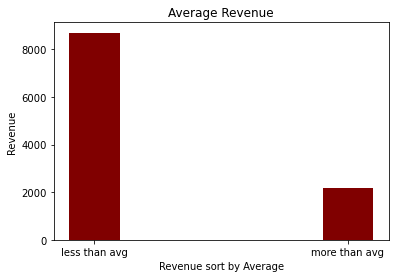

In [22]:
lessAvgRevenue = len(data[data['revenue'] <= AvgRevenue])
moreAvgRevenue  = len(data[data['revenue'] > AvgRevenue])
rows =['less than avg', 'more than avg']
columns = [lessAvgRevenue,moreAvgRevenue]
plt.bar(rows, columns, color ='maroon',
        width = 0.2)
 
plt.xlabel("Revenue sort by Average")
plt.ylabel("Revenue")
plt.title("Average Revenue")
plt.show()

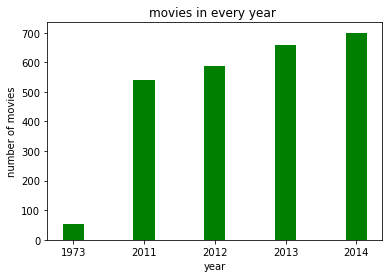

In [23]:

year1973=len(important_data[important_data['release_year'] == 1973])
year2011=len(important_data[important_data['release_year'] == 2011])
year2012=len(important_data[important_data['release_year'] == 2012])
year2013=len(important_data[important_data['release_year'] == 2013])
year2014=len(important_data[important_data['release_year'] == 2014])

rows =['1973','2011','2012','2013','2014']
columns =[year1973, year2011, year2012, year2013, year2014]
plt.bar(rows, columns, color ='green',width = 0.3)
 
plt.xlabel("year")
plt.ylabel("number of movies")
plt.title("movies in every year ")
plt.show()

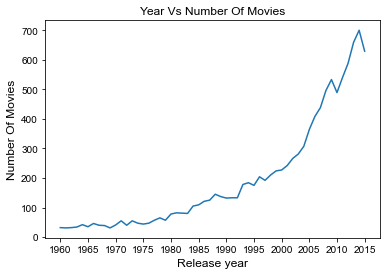

In [24]:
data=important_data.groupby('release_year').count()['id']
important_data.groupby('release_year').count()['id'].plot(xticks = np.arange(1960,2016,5))

sns.set(rc={'figure.figsize':(12,7)})
plt.title("Year Vs Number Of Movies",fontsize = 12)
plt.xlabel('Release year',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)
sns.set_style("darkgrid")

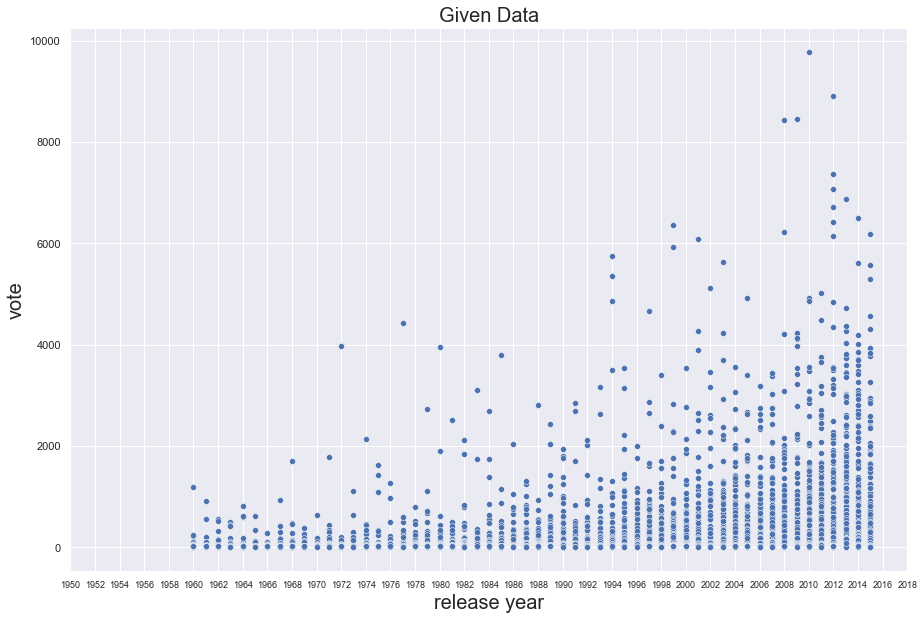

In [25]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="release_year",y="vote_count",data=important_data)
plt.xlabel("release year").set_fontsize(20)
plt.xticks( np.arange(1950, 2020, step=2),fontsize= 9)
plt.ylabel("vote").set_fontsize(20)
plt.title("Given Data").set_fontsize(20);

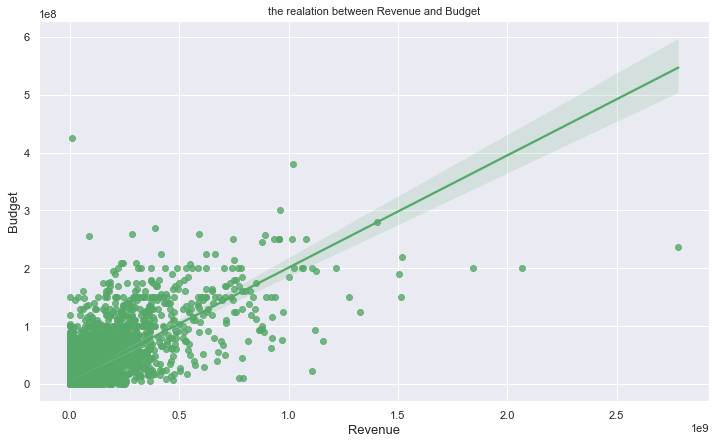

In [26]:
draw = sns.regplot(x=important_data['revenue'], y=important_data['budget'],color='g')

draw.set_title("the realation between Revenue and Budget",fontsize=11)
draw.set_xlabel("Revenue",fontsize=13)
draw.set_ylabel("Budget",fontsize=13)
sns.set(rc={'figure.figsize':(8,6)})
sns.set_style("darkgrid")

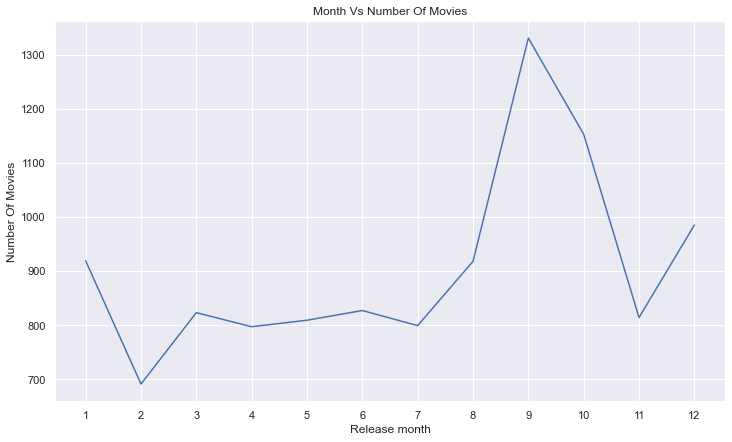

In [56]:
important_data['release_date'] = pd.to_datetime(important_data['release_date'])

data=important_data.groupby(important_data['release_date'].dt.month).count()['id']
important_data.groupby(important_data['release_date'].dt.month).count()['id'].plot(xticks = np.arange(1,13,1))
sns.set(rc={'figure.figsize':(12,7)})
plt.title("Month Vs Number Of Movies",fontsize = 12)
plt.xlabel('Release month',fontsize = 12)
plt.ylabel('Number Of Movies',fontsize = 12)
sns.set_style("darkgrid")